## Imp Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import time
from datetime import date

In [ ]:
!nvidia-smi

Wed Dec 16 10:41:41 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Dataset

A sales data record of 5000000* 14, with columns Region, Country, Item Type, Sales Channel, Order Priority, Order Date, Order ID, Ship date, units sold, unit price, unit cost, Total Revenue, Total Cost, Total Profit. 

No NA/ NAN is present in the dataset. 

The data is taken from http://eforexcel.com/wp/downloads-18-sample-csv-files-data-sets-for-testing-sales/ 

## Pandas

Pandas is probably the most popular method of reading datasets and is also the default on Kaggle. It has a lot of options, flexibility and functions for reading and processing data.

In [ ]:
link  = '/content/drive/MyDrive/5m.csv'

In [ ]:
import pandas as pd    #Hardware Accelerator: GPU
start = time.time()
df = pd.read_csv(link)
end = time.time() 
print(end-start)

9.287882566452026


In [ ]:
df.shape

(5000000, 14)

In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Palau,Office Supplies,Online,H,3/6/2016,517073523,3/26/2016,2401,651.21,524.96,1563555.21,1260428.96,303126.25
1,Europe,Poland,Beverages,Online,L,4/18/2010,380507028,5/26/2010,9340,47.45,31.79,443183.00,296918.60,146264.40
2,North America,Canada,Cereal,Online,M,1/8/2015,504055583,1/31/2015,103,205.70,117.11,21187.10,12062.33,9124.77
3,Europe,Belarus,Snacks,Online,C,1/19/2014,954955518,2/27/2014,1414,152.58,97.44,215748.12,137780.16,77967.96
4,Middle East and North Africa,Oman,Cereal,Offline,H,4/26/2019,970755660,6/2/2019,7027,205.70,117.11,1445453.90,822931.97,622521.93


## Dask
Dask provides a framework to scale pandas workflows natively using a parallel processing architecture. For those of you who have used Spark, you will find an uncanny similarity between the two.



In [ ]:
pip install dask[complete]

In [ ]:
import dask.dataframe as dd   #Hardware Accelerator: GPU
start = time.time()
df = dd.read_csv(link).compute()
end = time.time()
print(end-start)

9.244337320327759


In [ ]:
df.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Palau,Office Supplies,Online,H,3/6/2016,517073523,3/26/2016,2401,651.21,524.96,1563555.21,1260428.96,303126.25
1,Europe,Poland,Beverages,Online,L,4/18/2010,380507028,5/26/2010,9340,47.45,31.79,443183.00,296918.60,146264.40
2,North America,Canada,Cereal,Online,M,1/8/2015,504055583,1/31/2015,103,205.70,117.11,21187.10,12062.33,9124.77
3,Europe,Belarus,Snacks,Online,C,1/19/2014,954955518,2/27/2014,1414,152.58,97.44,215748.12,137780.16,77967.96
4,Middle East and North Africa,Oman,Cereal,Offline,H,4/26/2019,970755660,6/2/2019,7027,205.70,117.11,1445453.90,822931.97,622521.93


## Datatable
Datatable (heavily inspired by R's data.table) can read large datasets fairly quickly and is often faster than pandas. It is specifically meant for data processing of tabular datasets with emphasis on speed and support for large sized data.

In [ ]:
pip install datatable

In [ ]:
import datatable as dt   #Hardware Accelerator: GPU
start = time.time()
df = dt.fread(link)
end = time.time()
print(end-start)

4.364200115203857


In [ ]:
df.head(5)

   | Region                        Country  Item Type        Sales Channel  Order Priority  Order Date   Order ID  …
-- + ----------------------------  -------  ---------------  -------------  --------------  ----------  ---------   
 0 | Australia and Oceania         Palau    Office Supplies  Online         H               3/6/2016    517073523  …
 1 | Europe                        Poland   Beverages        Online         L               4/18/2010   380507028  …
 2 | North America                 Canada   Cereal           Online         M               1/8/2015    504055583  …
 3 | Europe                        Belarus  Snacks           Online         C               1/19/2014   954955518  …
 4 | Middle East and North Africa  Oman     Cereal           Offline        H               4/26/2019   970755660  …

[5 rows x 14 columns]


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,Australia and Oceania,Palau,Office Supplies,Online,H,3/6/2016,517073523,3/26/2016,2401,651.21,524.96,1.56356e+06,1.26043e+06,303126
1,Europe,Poland,Beverages,Online,L,4/18/2010,380507028,5/26/2010,9340,47.45,31.79,443183,296919,146264
2,North America,Canada,Cereal,Online,M,1/8/2015,504055583,1/31/2015,103,205.7,117.11,21187.1,12062.3,9124.77
3,Europe,Belarus,Snacks,Online,C,1/19/2014,954955518,2/27/2014,1414,152.58,97.44,215748,137780,77968
4,Middle East and North Africa,Oman,Cereal,Offline,H,4/26/2019,970755660,6/2/2019,7027,205.7,117.11,1.44545e+06,822932,622522


In [ ]:
df.shape

(5000000, 14)

Format: feather
It is common to store data in feather (binary) format specifically for pandas. It significantly improves reading speed of datasets.

## Modin

A library which helps pandas to read big files and boosts its speed. All syntax is same as pandas.

In [ ]:
pip install modin[dask]

In [ ]:
import modin.pandas as mpd    #Hardware Accelerator: GPU
start = time.time()
df = mpd.read_csv(link)
end = time.time()
print(end-start)

9.73063063621521


In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Palau,Office Supplies,Online,H,3/6/2016,517073523,3/26/2016,2401,651.21,524.96,1563555.21,1260428.96,303126.25
1,Europe,Poland,Beverages,Online,L,4/18/2010,380507028,5/26/2010,9340,47.45,31.79,443183.00,296918.60,146264.40
2,North America,Canada,Cereal,Online,M,1/8/2015,504055583,1/31/2015,103,205.70,117.11,21187.10,12062.33,9124.77
3,Europe,Belarus,Snacks,Online,C,1/19/2014,954955518,2/27/2014,1414,152.58,97.44,215748.12,137780.16,77967.96
4,Middle East and North Africa,Oman,Cereal,Offline,H,4/26/2019,970755660,6/2/2019,7027,205.70,117.11,1445453.90,822931.97,622521.93


In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!bash rapidsai-csp-utils/colab/rapids-colab.sh

import sys, os

dist_package_index = sys.path.index('/usr/local/lib/python3.6/dist-packages')
sys.path = sys.path[:dist_package_index] + ['/usr/local/lib/python3.6/site-packages'] + sys.path[dist_package_index:]
sys.path
exec(open('rapidsai-csp-utils/colab/update_modules.py').read(), globals())


fatal: destination path 'rapidsai-csp-utils' already exists and is not an empty directory.
PLEASE READ
********************************************************************************************************
Changes:
1. IMPORTANT CHANGES: RAPIDS on Colab will be pegged to 0.14 Stable until further notice.
2. Default stable version is now 0.14.  Nightly will redirect to 0.14.
3. You can now declare your RAPIDSAI version as a CLI option and skip the user prompts (ex: '0.14' or '0.15', between 0.13 to 0.14, without the quotes): 
        "!bash rapidsai-csp-utils/colab/rapids-colab.sh <version/label>"
        Examples: '!bash rapidsai-csp-utils/colab/rapids-colab.sh 0.14', or '!bash rapidsai-csp-utils/colab/rapids-colab.sh stable', or '!bash rapidsai-csp-utils/colab/rapids-colab.sh s'
                  '!bash rapidsai-csp-utils/colab/rapids-colab.sh 0.15, or '!bash rapidsai-csp-utils/colab/rapids-colab.sh nightly', or '!bash rapidsai-csp-utils/colab/rapids-colab.sh n'
Enjoy using RAPIDS! 

In [ ]:
import time

In [ ]:
import cudf      #Hardware accelerator: GPU
start=time.time()
df=cudf.read_csv(link)
end=time.time()
print(end-start)

/usr/local/lib/python3.6/site-packages/fsspec/implementations/local.py:33: FutureWarning: The default value of auto_mkdir=True has been deprecated and will be changed to auto_mkdir=False by default in a future release.
  FutureWarning,


In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Palau,Office Supplies,Online,H,3/6/2016,517073523,3/26/2016,2401,651.21,524.96,1563555.21,1260428.96,303126.25
1,Europe,Poland,Beverages,Online,L,4/18/2010,380507028,5/26/2010,9340,47.45,31.79,443183.00,296918.60,146264.40
2,North America,Canada,Cereal,Online,M,1/8/2015,504055583,1/31/2015,103,205.70,117.11,21187.10,12062.33,9124.77
3,Europe,Belarus,Snacks,Online,C,1/19/2014,954955518,2/27/2014,1414,152.58,97.44,215748.12,137780.16,77967.96
4,Middle East and North Africa,Oman,Cereal,Offline,H,4/26/2019,970755660,6/2/2019,7027,205.70,117.11,1445453.90,822931.97,622521.93


In [ ]:
import dask_cudf
start=time.time()
df=dask_cudf.read_csv(link)
end=time.time()
print(end-start)

0.04790544509887695


In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Palau,Office Supplies,Online,H,3/6/2016,517073523,3/26/2016,2401,651.21,524.96,1563555.21,1260428.96,303126.25
1,Europe,Poland,Beverages,Online,L,4/18/2010,380507028,5/26/2010,9340,47.45,31.79,443183.00,296918.60,146264.40
2,North America,Canada,Cereal,Online,M,1/8/2015,504055583,1/31/2015,103,205.70,117.11,21187.10,12062.33,9124.77
3,Europe,Belarus,Snacks,Online,C,1/19/2014,954955518,2/27/2014,1414,152.58,97.44,215748.12,137780.16,77967.96
4,Middle East and North Africa,Oman,Cereal,Offline,H,4/26/2019,970755660,6/2/2019,7027,205.70,117.11,1445453.90,822931.97,622521.93


In [ ]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-07cda818-b9a2-1a43-7989-e4469e8b7bf9)


In [ ]:
!nvidia-smi

Wed Dec 16 11:48:43 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#no.of sockets i.e available slots for physical processors
!lscpu | grep 'Socket(s):'

Socket(s):           1


In [ ]:
!lscpu | grep 'Core(s) per socket:'

Core(s) per socket:  1


In [ ]:
!lscpu | grep 'Thread(s) per core'
 

Thread(s) per core:  2


In [ ]:
!lscpu | grep "L3 cache"

L3 cache:            46080K


In [ ]:
!lscpu | grep "MHz"

CPU MHz:             2299.998


In [ ]:
!free -h --si | awk  '/Mem:/{print $2}'

13G


In [ ]:
!df -h / | awk '{print $4}'

Avail
26G






## Time analysis on GPU
Pandas    = 9.28 sec.

Dask      = 9.24 sec.

Datatable = 4.364 sec.

Modin     = 9.73 sec.

Dask_cudf = 0.0644 sec. 

CUDF = 1.82 sec.

Modin > pandas > Dask > Datatable > CUDF > Dask_cudf

1. The Datatable toolkit resembeles pandas very closely but is more focused on speed.

2. cuDF and dask_cudf is a special library designed to work on GPU

3. It is seen Pandas performs better than Modin on GPU.

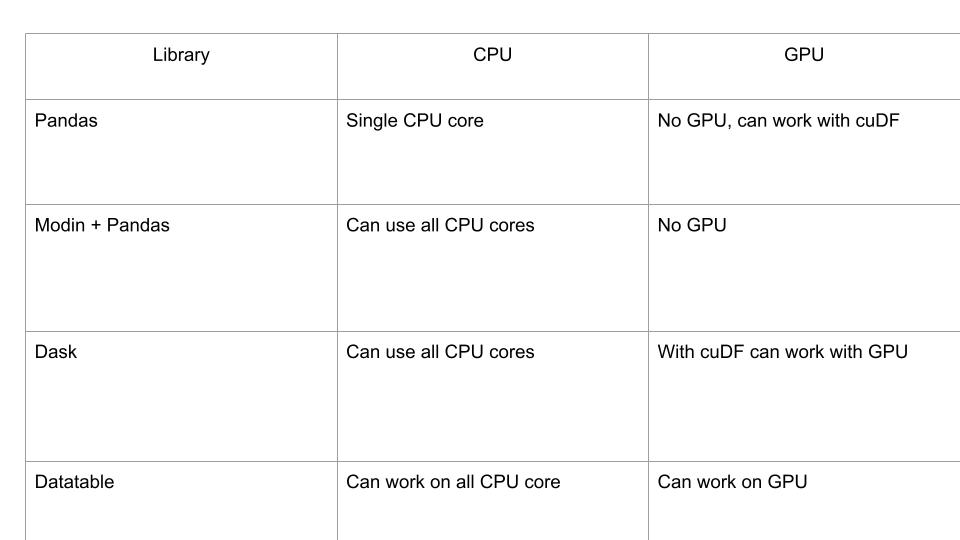

# Conclusion

cuDf or dask_cudf should be preferred if GPU is available, and we have to choose between these two prefer dask_cudf for gb's of data